In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix

In [3]:
 vins = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/winequality-red.csv');

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [60]:
vins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [14]:
vins

fixed acidity  volatile acidity  citric acid  ...  sulphates  alcohol  quality
0               7.4             0.700         0.00  ...       0.56      9.4        5
1               7.8             0.880         0.00  ...       0.68      9.8        5
2               7.8             0.760         0.04  ...       0.65      9.8        5
3              11.2             0.280         0.56  ...       0.58      9.8        6
4               7.4             0.700         0.00  ...       0.56      9.4        5
...             ...               ...          ...  ...        ...      ...      ...
1594            6.2             0.600         0.08  ...       0.58     10.5        5
1595            5.9             0.550         0.10  ...       0.76     11.2        6
1596            6.3             0.510         0.13  ...       0.75     11.0        6
1597            5.9             0.645         0.12  ...       0.71     10.2        5
1598            6.0             0.310         0.47  ...       0.66     11.0        6

[1599 rows x 12 columns]

In [15]:
vins.describe()

fixed acidity  volatile acidity  ...      alcohol      quality
count    1599.000000       1599.000000  ...  1599.000000  1599.000000
mean        8.319637          0.527821  ...    10.422983     5.636023
std         1.741096          0.179060  ...     1.065668     0.807569
min         4.600000          0.120000  ...     8.400000     3.000000
25%         7.100000          0.390000  ...     9.500000     5.000000
50%         7.900000          0.520000  ...    10.200000     6.000000
75%         9.200000          0.640000  ...    11.100000     6.000000
max        15.900000          1.580000  ...    14.900000     8.000000

[8 rows x 12 columns]

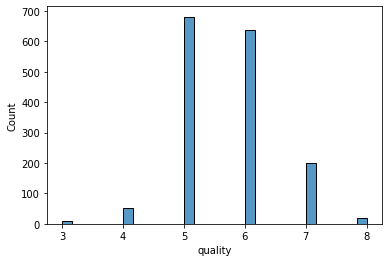

In [16]:
sns.histplot(vins["quality"])

La majorité des vins rouges ont une qualité entre 5 et 6 sur 10.
maintenant regardons si les parametres du vins ont une influence sur la qualité du vins

In [45]:
sns.lmplot(data=vins.sample(75), y="fixed acidity", x="quality" ).fig.set_size_inches(20,6)

nous pouvons constater avec la courbe que la variable fixed acidited n'est pas tres représentatif du bonne ou mauvaise qualité du vin rouge

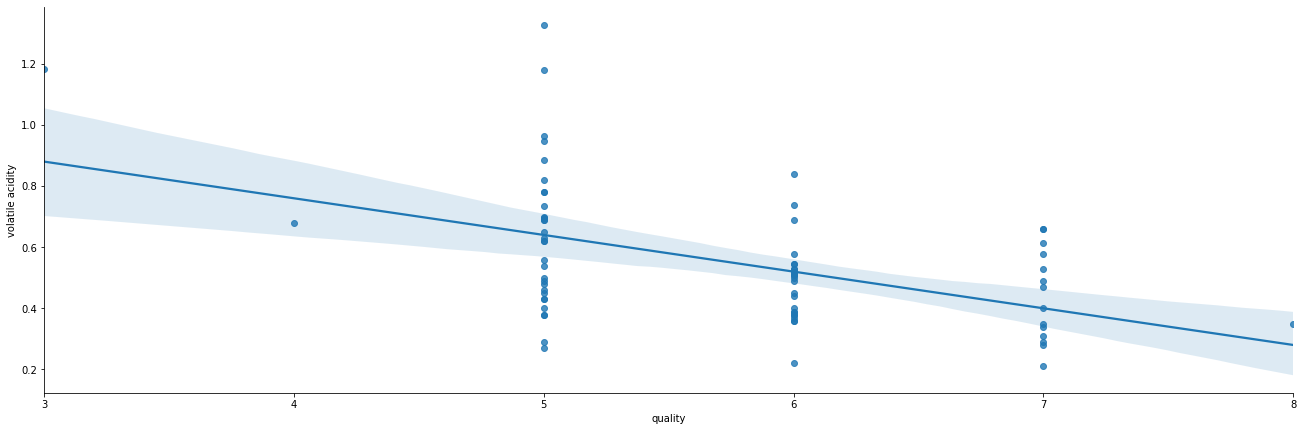

In [46]:
sns.lmplot(data=vins.sample(75), y="volatile acidity", x="quality" ).fig.set_size_inches(20,6)

Nous pouvons constater que la donnée volatile acidity a un fort impacte sur la qualité du vin il seras intéressant de l'utilisé pour l'algorythme de ml

In [60]:
sns.lmplot(data=vins.sample(75), y="citric acid", x="quality" ).fig.set_size_inches(20,6)

In [61]:
sns.boxplot(data=vins , x='quality', y='citric acid')

Nous pouvons déduire de la courbe et de la boite a moustache que la variable **citric acid**  a une influence sur la qualité du vin








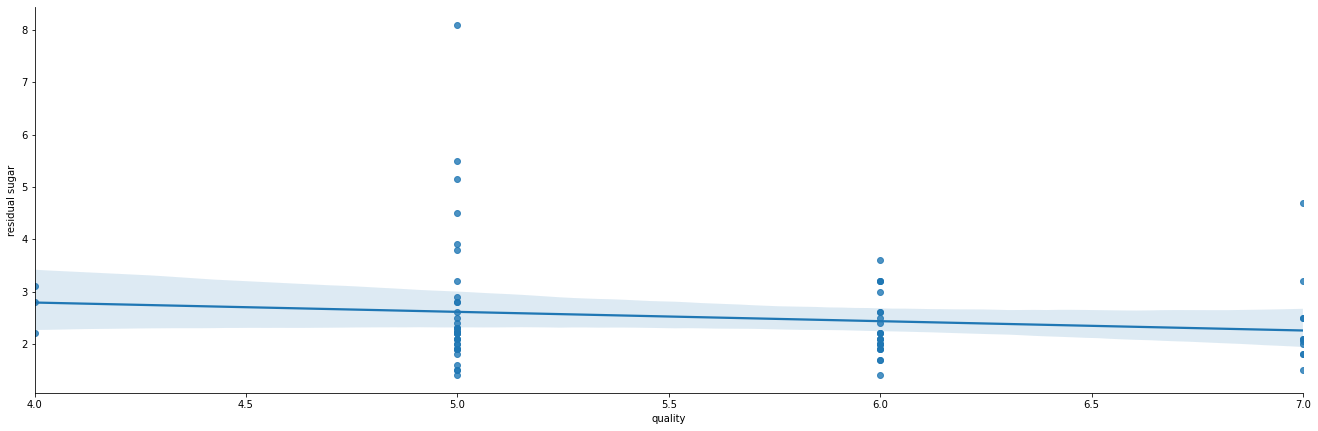

In [23]:
sns.lmplot(data=vins.sample(75), y="residual sugar", x="quality" ).fig.set_size_inches(20,6)

nous pouvons observer que la variable **residual sugar** n'as pas assez représentatif de la qualité du vin

In [24]:
sns.lmplot(data=vins.sample(75), y="chlorides", x="quality" ).fig.set_size_inches(20,6)

Nous pouvons constater que la variable chlorides n'as pas d'influence sur la qualité du vin rouge

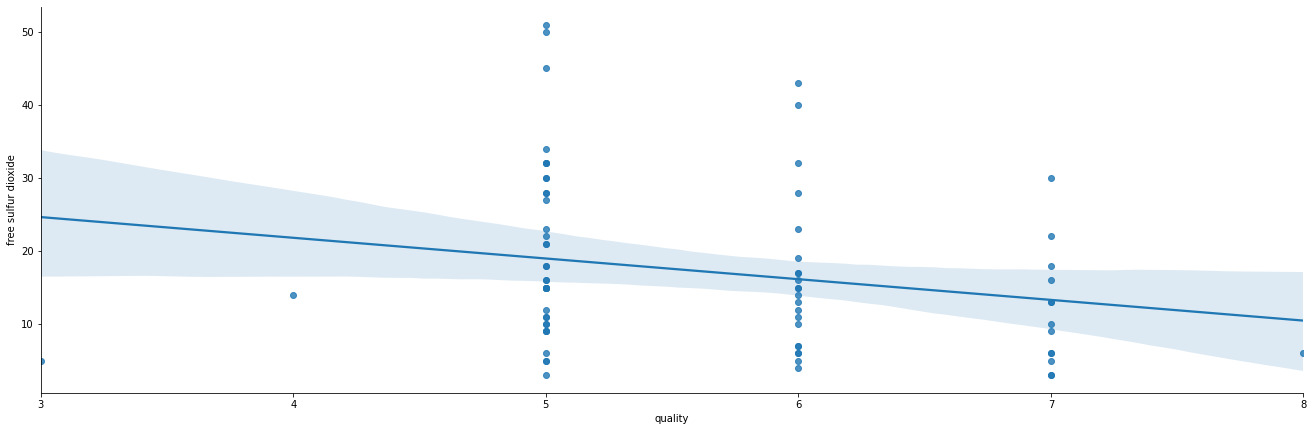

In [25]:
 sns.lmplot(data=vins.sample(75), y="free sulfur dioxide", x="quality" ).fig.set_size_inches(20,6)

En regardand la courbe nous pouvons déduire que le free sulfure dioxyde n'as peu d'influence sur la qualité du vin

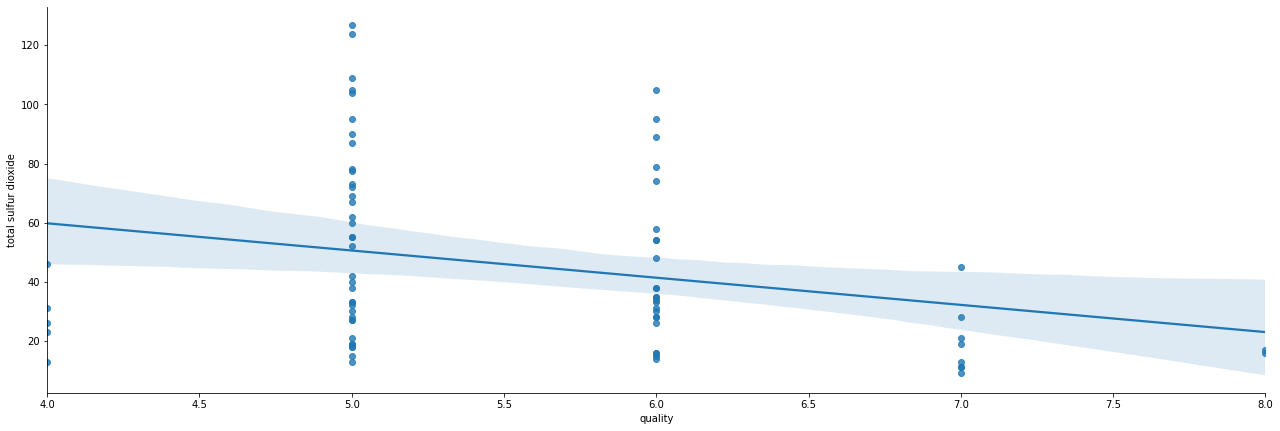

In [26]:
sns.lmplot(data=vins.sample(75), y="total sulfur dioxide", x="quality" ).fig.set_size_inches(20,6)

Nous pouvons déduire que le total sulfure dioxyde n'as pas d'influence sur la qualité du vin

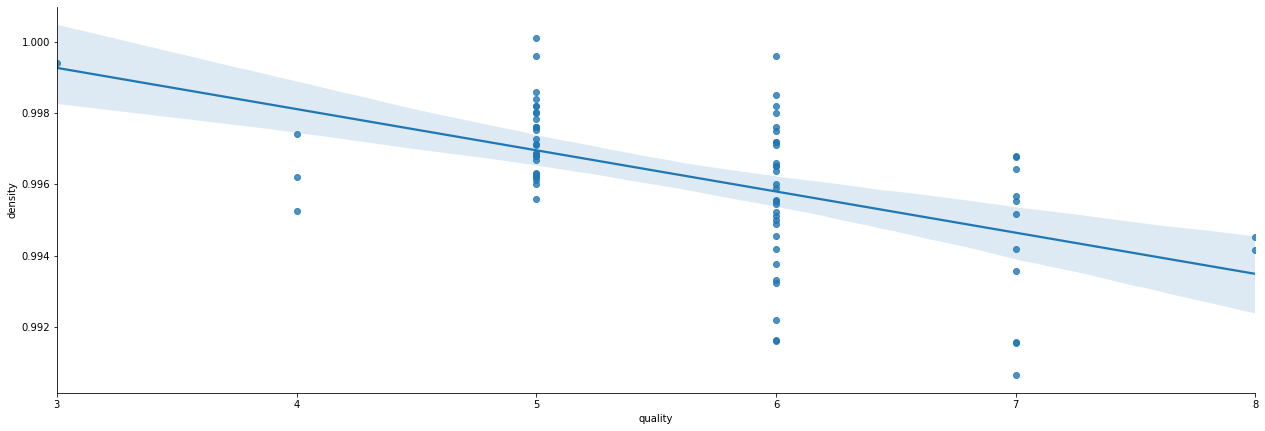

In [27]:
sns.lmplot(data=vins.sample(75), y="density", x="quality" ).fig.set_size_inches(20,6)

Nous pouvons voir que la densité a une légère influence sur la qualité du vin plus la densité est basse plus le vin est considéré de meilleur qualité

In [28]:
sns.lmplot(data=vins.sample(75), y="pH", x="quality" ).fig.set_size_inches(20,6)

In [62]:
sns.boxplot(data=vins , x='quality', y='pH')

Le Ph n'as pas d'influence sur la qualité du vin

In [30]:
sns.lmplot(data=vins.sample(75), y="sulphates", x="quality" ).fig.set_size_inches(20,6)

nous pouvons constater que le sulphates a une forte influence sur la qualité du vin plus il y en as plus le vin est considéré comme bon

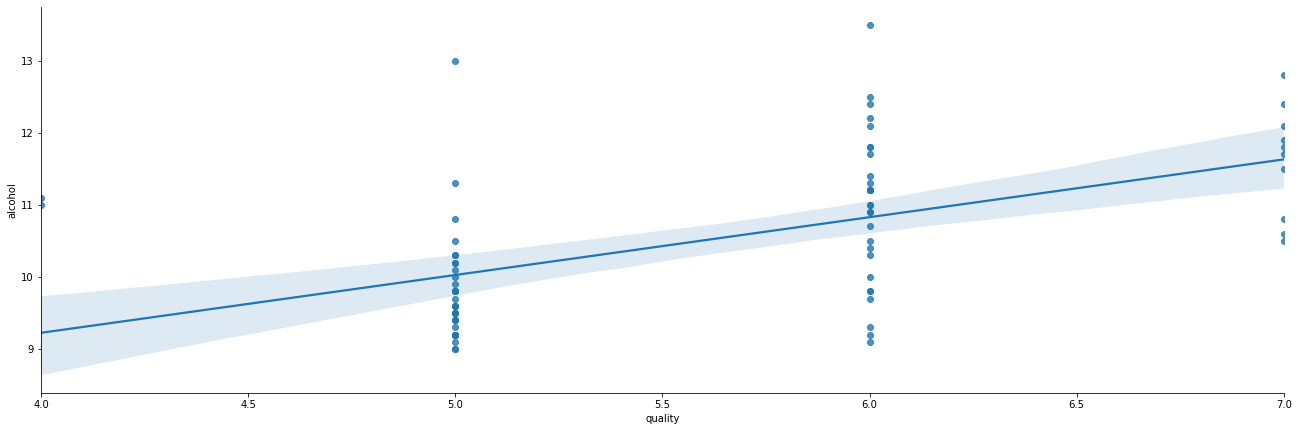

In [33]:
sns.lmplot(data=vins.sample(75), y="alcohol", x="quality" ).fig.set_size_inches(20,6)

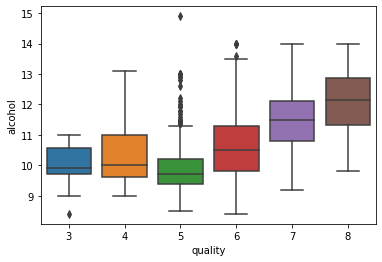

In [58]:
sns.boxplot(data=vins , x='quality', y='alcohol')

Nous pouvons remarquer plus il y a **d'alcohol** dans le vins plus il est considéré comme meileur

In [31]:
sns.heatmap(vins.corr(), annot=True,square=True)

d'apres la matrice de coorélation nous ne pouvons pas en tirer beaucoup de conclusion a partir de la donnée qualité

In [4]:
mlVIN = pd.get_dummies(vins)

In [5]:
mlVIN = mlVIN.drop(["fixed acidity", "residual sugar", "chlorides", "free sulfur dioxide", "pH", "quality"], axis=1)

In [6]:
mlVIN

volatile acidity  citric acid  ...  sulphates  alcohol
0                0.700         0.00  ...       0.56      9.4
1                0.880         0.00  ...       0.68      9.8
2                0.760         0.04  ...       0.65      9.8
3                0.280         0.56  ...       0.58      9.8
4                0.700         0.00  ...       0.56      9.4
...                ...          ...  ...        ...      ...
1594             0.600         0.08  ...       0.58     10.5
1595             0.550         0.10  ...       0.76     11.2
1596             0.510         0.13  ...       0.75     11.0
1597             0.645         0.12  ...       0.71     10.2
1598             0.310         0.47  ...       0.66     11.0

[1599 rows x 6 columns]

Nous avons créer un tableau mlVin avec les parametres qui selont nous ont une influence sur la qualité du vin

In [9]:
X = mlVIN
y = vins['quality']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50, random_state=20)

NOus avons crée notre X et notre Y que nous venons train

In [11]:
random_forest_classifier = RandomForestClassifier(n_estimators=200)
random_forest_classifier.fit(X_train, y_train)
pred_random_forest_classifier = random_forest_classifier.predict(X_test)
print(classification_report(y_test, pred_random_forest_classifier))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00        22
           5       0.70      0.77      0.73       352
           6       0.58      0.62      0.60       312
           7       0.60      0.48      0.53       101
           8       0.00      0.00      0.00         9

    accuracy                           0.64       800
   macro avg       0.31      0.31      0.31       800
weighted avg       0.61      0.64      0.62       800



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Nous pouvons voir que nous avons une préssicion de 0.61 et une accuracy de 0.64



In [34]:
print(confusion_matrix(y_test, pred_random_forest_classifier))

[[  0   0   3   1   0   0]
 [  0   0  13   9   0   0]
 [  0   2 270  78   2   0]
 [  0   2  90 193  27   0]
 [  0   0   7  46  48   0]
 [  0   0   0   6   3   0]]


Nous pouvons en dire que est en underfitting car il devrais etre correcte a partir de 70% accuracy 